In [1]:
import numpy as np
import matplotlib.pyplot as plt

(0.0, 0.2)

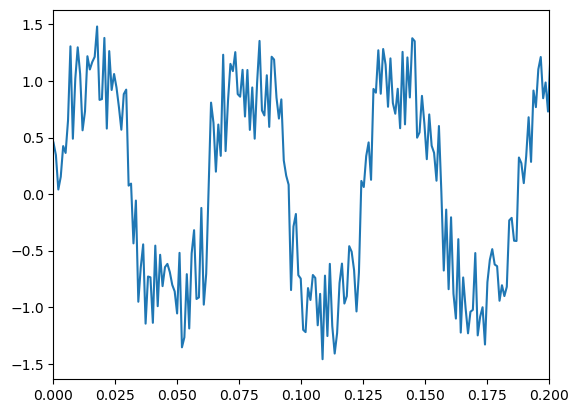

In [ ]:
data1 = np.loadtxt("https://websites.umich.edu/~mejn/cp/data/pitch.txt")
time1 = np.linspace(0, 1, len(data1)) # assume data is a one-second sample

plt.plot(time1, data1)
plt.xlim(0, 0.2)

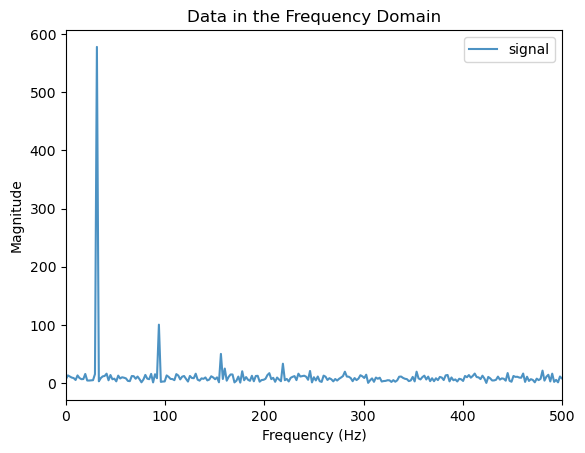

In [3]:
#window1 = np.hanning(len(data1))

# Apply the real Fast Fourier Transform (rfft)
data_freq1 = np.fft.rfft(data1)  # Multiply the window with the signal
frequencies1 = np.fft.rfftfreq(len(data1)) * 2000 # Adjust with the sampling frequency

plt.plot(frequencies1, np.abs(data_freq1), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0, 500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()

Text(0, 0.5, 'Counts')

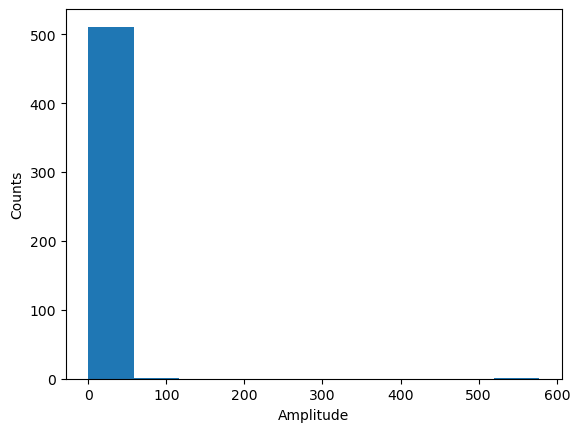

In [4]:
plt.hist(np.abs(data_freq1))
plt.xlabel("Amplitude")
plt.ylabel("Counts")

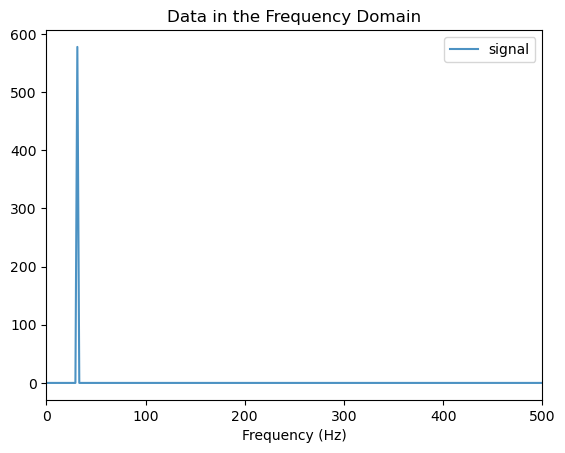

In [ ]:
#denoised reconstruction

threshold1 = 150
accepted1 = np.abs(data_freq1)
accepted1[accepted1 < threshold1] = 0
accepted1[accepted1!=0] = 1

# accepted = np.where(,,)
data_freq_filtered1 = np.multiply(data_freq1, accepted1)

plt.plot(frequencies1, np.abs(data_freq_filtered1), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0,500)
plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()


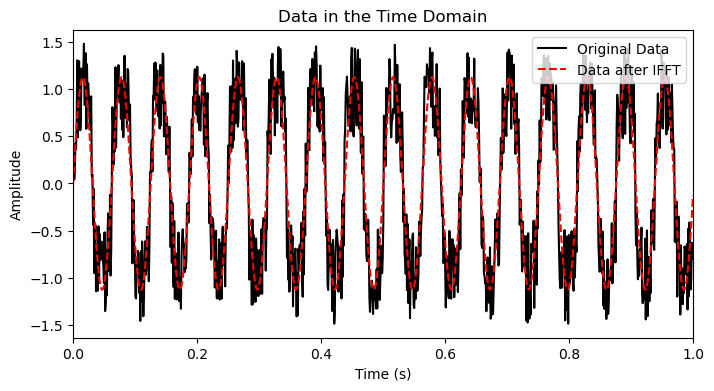

In [6]:
# Apply Inverse Fourier Transform
data_after_ifft1 = np.fft.irfft(data_freq_filtered1)  # Use the filtered frequency data

# Plot the original and reconstructed signals
plt.figure(figsize=(8, 4))
plt.plot(time1, data1, label='Original Data', color='k')  # Fill in correct variables
plt.plot(time1[:len(data_after_ifft1)], data_after_ifft1, '--', label='Data after IFFT', color='r')

# Formatting
plt.xlim(0, 1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data in the Time Domain')
plt.legend(loc='upper right')

plt.show()


In [7]:
threshold_freq = 40
frequencies = np.fft.rfftfreq(len(data1)) * len(data1) # Adjust with the sampling frequency
accepted_freq = frequencies1
accepted_freq[accepted_freq > threshold_freq] = 0
accepted_freq[accepted_freq != 0] = 1
low_pass_data_freq = np.multiply(accepted_freq, data_freq1)

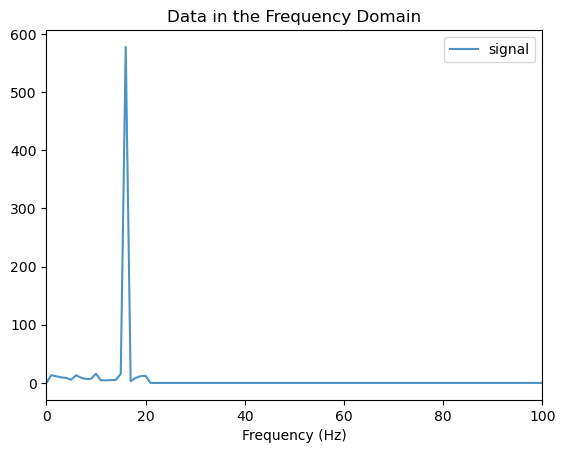

In [8]:
plt.plot(frequencies, np.abs(low_pass_data_freq), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0,100)
plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()


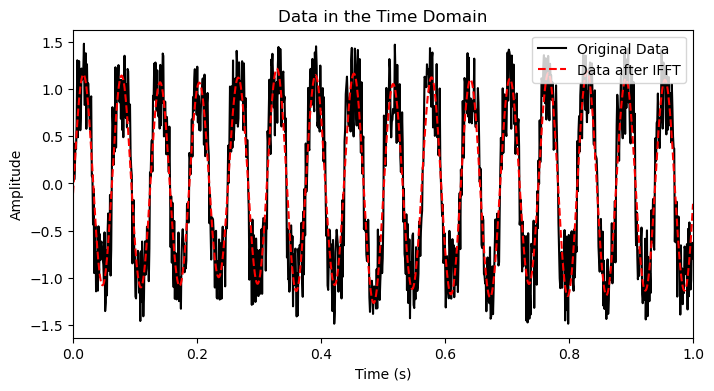

In [ ]:
#lowpass filtering

data_after_ifft1_lowpass = np.fft.irfft(low_pass_data_freq)  # Use the filtered frequency data


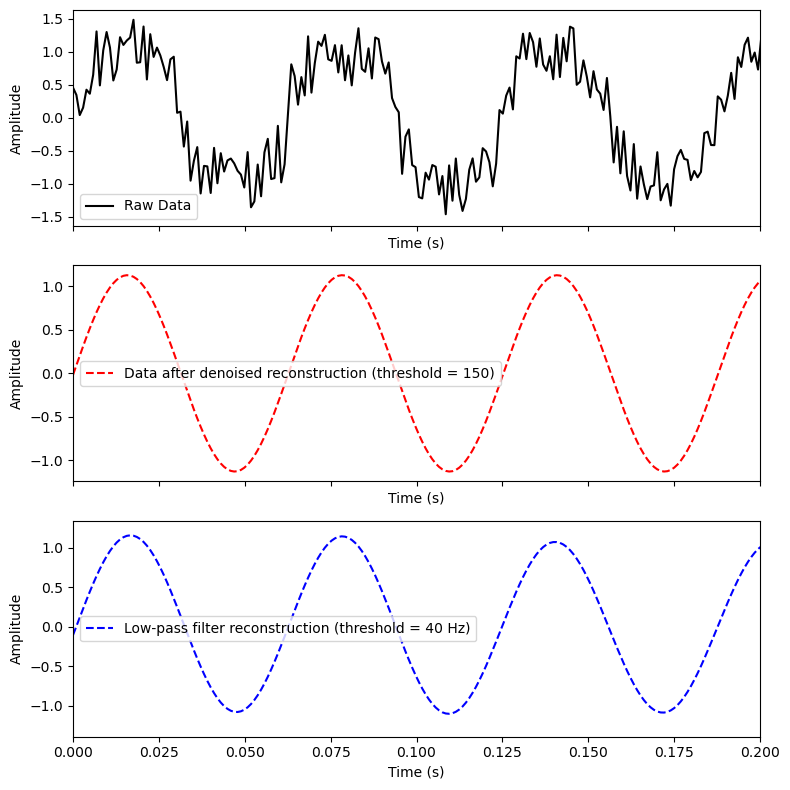

In [10]:
fig, axes = plt.subplots(3, figsize=(8, 8), sharex = True) #4 rows, 1 column, shared x-axis

# Plot individual sine waves
axes[0].plot(time1, data1, label='Raw Data', color='k')
axes[1].plot(time1[:len(data_after_ifft1)], data_after_ifft1, '--', label='Data after denoised reconstruction (threshold = 150)', color='r')
axes[2].plot(time1[:len(data_after_ifft1_lowpass)], data_after_ifft1_lowpass, '--', label='Low-pass filter reconstruction (threshold = 40 Hz)', color='b')
# Plot the combined signal


# Formatting
for ax in axes:
    ax.set_xlim(0, 0.2)
    ax.legend()
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time (s)')

plt.tight_layout()
plt.savefig('signal_processing.png', bbox_inches = 'tight')


In [ ]:
data1 = np.loadtxt("https://websites.umich.edu/~mejn/cp/data/pitch.txt")
time1 = np.linspace(0, 1, len(data1)) # assume data is a one-second sample

plt.plot(time1, data1)
plt.xlim(0, 0.2)

#window1 = np.hanning(len(data1))

# Apply the real Fast Fourier Transform (rfft)
data_freq1 = np.fft.rfft(data1)  # Multiply the window with the signal
frequencies1 = np.fft.rfftfreq(len(data1)) * 2000 # Adjust with the sampling frequency

plt.plot(frequencies1, np.abs(data_freq1), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0, 500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()

threshold1 = 150
accepted1 = np.abs(data_freq1)
accepted1[accepted1 < threshold1] = 0
accepted1[accepted1!=0] = 1

# accepted = np.where(,,)
data_freq_filtered1 = np.multiply(data_freq1, accepted1)

plt.plot(frequencies1, np.abs(data_freq_filtered1), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0,500)
plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()

data_after_ifft1 = np.fft.irfft(data_freq_filtered1)  # Use the filtered frequency data

threshold_freq = 40
frequencies = np.fft.rfftfreq(len(data1)) * len(data1) # Adjust with the sampling frequency
accepted_freq = frequencies1
accepted_freq[accepted_freq > threshold_freq] = 0
accepted_freq[accepted_freq != 0] = 1
low_pass_data_freq = np.multiply(accepted_freq, data_freq1)

plt.plot(frequencies, np.abs(low_pass_data_freq), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlim(0,100)
plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()

data_after_ifft1_lowpass = np.fft.irfft(low_pass_data_freq)  # Use the filtered frequency data

fig, axes = plt.subplots(3, figsize=(8, 8), sharex = True) #4 rows, 1 column, shared x-axis

# Plot individual sine waves
axes[0].plot(time1, data1, label='Raw Data', color='k')
axes[1].plot(time1[:len(data_after_ifft1)], data_after_ifft1, '--', label='Data after denoised reconstruction (threshold = 150)', color='r')
axes[2].plot(time1[:len(data_after_ifft1_lowpass)], data_after_ifft1_lowpass, '--', label='Low-pass filter reconstruction (threshold = 40 Hz)', color='b')
# Plot the combined signal


# Formatting
for ax in axes:
    ax.set_xlim(0, 0.2)
    ax.legend()
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time (s)')

plt.tight_layout()
plt.savefig('signal_processing.png', bbox_inches = 'tight')
